In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from env import user, password, host
import warnings
warnings.filterwarnings('ignore')

def acquire_mall():
    if os.path.exists('customers.csv'):
        return pd.read_csv('customers.csv', index_col=0)
    else:
        ''' Acquire data from mall_customers using env imports and rename columns'''

        url = f"mysql+pymysql://{user}:{password}@{host}/mall_customers"

        query = """
        SELECT *
        FROM customers
        """

        df = pd.read_sql(query, url)


        
        return df

In [15]:
mall = acquire_mall()

In [22]:
mall

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
mall.shape

(200, 5)

In [20]:
mall.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
type(mall)

pandas.core.frame.DataFrame

In [23]:
train_val, test = train_test_split(mall, train_size=0.7, random_state=1349)
train, validate = train_test_split(train_val, train_size=0.8, random_state=1349)

In [28]:
trains = train.dropna()

In [29]:
trains.head()

,customer_id,gender,age,annual_income,spending_score
33,34,Male,18,33,92
44,45,Female,49,39,28
136,137,Female,44,73,7
129,130,Male,38,71,75
130,131,Male,47,71,9


In [47]:
trains.shape

(112, 5)

Text(0.5, 1.0, 'Scaled')

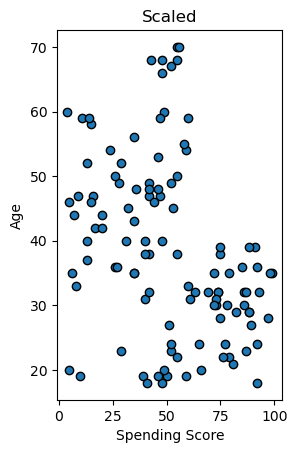

In [45]:
plt.subplot(122)
plt.scatter(trains.spending_score, trains.age, ec='black')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.title('Scaled')